# Installing and Importing the libraries

In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 26.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 69.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━

In [2]:
!pip install autoviz -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geoviews 1.10.1 requires bokeh<3.3.0,>=3.1.0, but you have bokeh 2.4.3 which is incompatible.
geoviews 1.10.1 requires holoviews>=1.16.0, but you have holoviews 1.14.9 which is incompatible.
geoviews 1.10.1 requires panel>=1.0.0, but you have panel 0.14.4 which is incompatible.


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import joblib

from pycaret.regression import *
from pycaret import *

import warnings
warnings.filterwarnings('ignore')

# Load and Prepare Data

In [8]:
#Read the dataset and print the top 5 elements of the dataset
df = pd.read_csv('/kaggle/input/house-price-tehran-iran/housePrice.csv')
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
46,51,1,True,True,True,Gisha,2.980000e+09,99333.33
2781,60,1,False,True,False,Beryanak,8.300000e+08,27666.67
2236,235,3,True,True,True,Niavaran,2.850000e+10,950000.00
2911,45,1,False,False,False,Karoon,6.800000e+08,22666.67
203,150,3,True,True,True,Zaferanieh,1.049000e+10,349666.67


# Explore the data (EDA) and have Preprocessing

In [4]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [9]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [10]:
df = df.drop("Price(USD)", axis=1)

In [11]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [12]:
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))

In [13]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [14]:
# I will drop missing values although it is not necessary because used models can manage missing values.
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3456 non-null   int64  
 1   Room       3456 non-null   int64  
 2   Parking    3456 non-null   bool   
 3   Warehouse  3456 non-null   bool   
 4   Elevator   3456 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3456 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 145.1+ KB


In [16]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
1134,123,3,True,True,True,Nezamabad,"3,300,000,000"
2838,125,3,True,False,False,Mirdamad,"6,500,000,000"
2034,86,2,True,True,True,Gheitarieh,"7,200,000,000"
473,150,3,True,True,True,Karimkhan,"7,800,000,000"
216,180,3,True,True,True,Farmanieh,"20,700,000,000"


# Visualization

In [17]:
fig = px.histogram(df, x='Price', nbins=30, marginal="rug", title="Price Distribution")
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Frequency",
    bargap=0.05,  # Adjust the gap between bars
    bargroupgap=0.1,  # Adjust the gap between bar groups
)
fig.update_traces(marker_color="blue", opacity=0.7)

fig.show()

<Axes: >

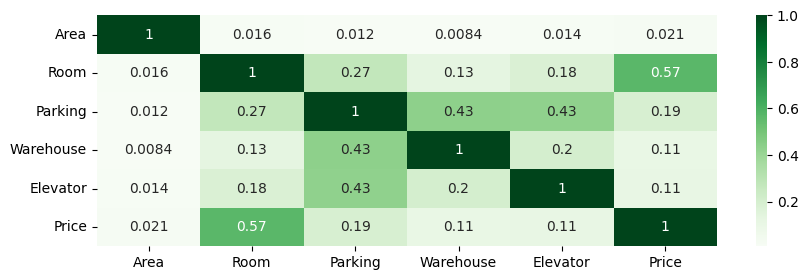

In [18]:

column_to_exclude = 'Address'
df_without_column = df.drop(columns=[column_to_exclude])

# Create a correlation matrix
corr = df_without_column.corr()


plt.figure(figsize=(10,3)) 
sns.heatmap(corr, cmap='Greens', annot=True)


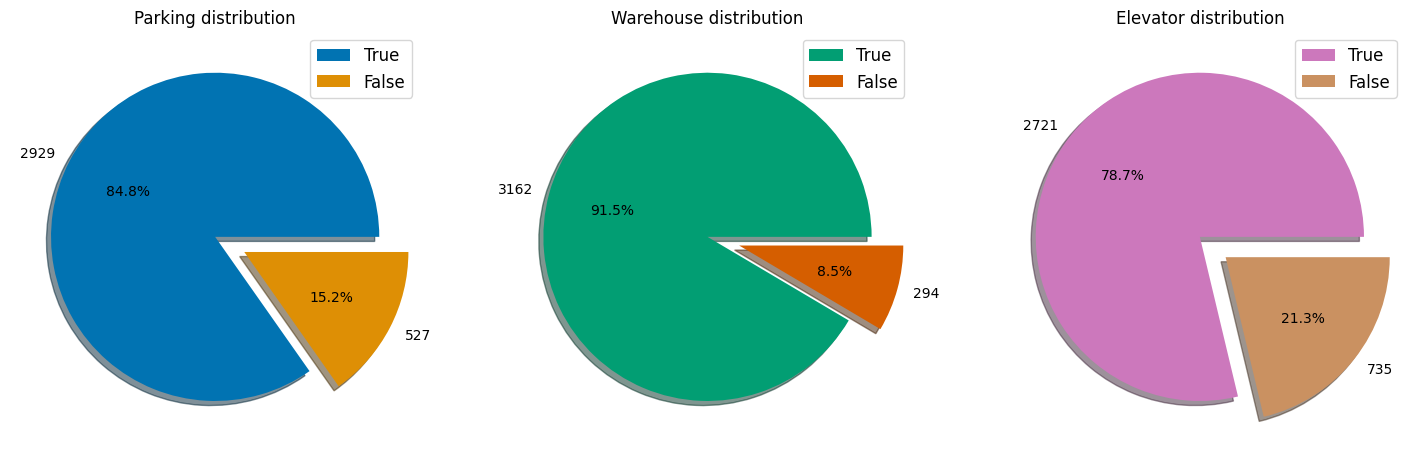

In [19]:
# Define the Color Blind 10 palette
color_palette = sns.color_palette("colorblind")

fig, ax = plt.subplots(ncols=3, figsize=(18, 6))

# Use the Color Blind 10 palette for colors
colors = [color_palette[0:2], color_palette[2:4], color_palette[4:6]]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']

for i, column in enumerate(columns):
    data = df[column].value_counts()
    ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True, autopct='%1.1f%%')
    ax[i].legend(labels=data.index, fontsize='large')
    ax[i].set_title(f'{column} distribution')

plt.show()

# Model Building

In [20]:
# first we will check the model in pycaret
setup(df, target = "Price", session_id = 1, remove_outliers = True)

,Description,Value
0,Session id,1
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3456, 7)"
4,Transformed data shape,"(3335, 7)"
5,Transformed train set shape,"(2298, 7)"
6,Transformed test set shape,"(1037, 7)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


In [21]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:35:33
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Least Angle Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,889457785000398.2500,915515263519018035743259097038848.0000,12574537572968102.0000,-13997411610671.4609,1.0455,97039.5775,0.2220
ridge,Ridge Regression,972705384286389.6250,1111859452679650742971330180677632.0000,13727396590452358.0000,-17025494946193.5684,1.1107,106022.7041,0.2070
lasso,Lasso Regression,972992086134993.7500,1112570817357096313330235433025536.0000,13731366458622572.0000,-17036468259583.8008,1.1102,106053.6396,0.1790
lr,Linear Regression,972992198554560.2500,1112571118285320885866890203758592.0000,13731367985296104.0000,-17036472930754.9414,1.1102,106053.6517,0.5730


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Implementing my own model

In [ ]:
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

In [ ]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Compute skewness for the numeric columns
skewness = numeric_columns.skew()

print(skewness)

In [ ]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

In [ ]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

In [ ]:
df.shape

In [ ]:
df1 = df.copy()

In [ ]:
# Filter the DataFrame based on the limits
filtered_df = df1[(df1['Area'] >= lower_area) & (df1['Area'] <= upper_area) & (df1['Price'] >= lower_price) & (df1['Price'] <= upper_price)]

In [ ]:
filtered_df.shape

In [ ]:
filtered_df

In [ ]:
filtered_df['Address'].nunique()

In [ ]:
X = filtered_df.drop(columns = 'Price')
y = filtered_df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 222)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder




from tqdm import tqdm



from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

In [ ]:


categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)



print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

In [ ]:
pip install wandb -qu

In [ ]:
import wandb

In [ ]:
wandb.login()


In [37]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 222)

categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)



# Random Forest Regressor
rf_model = RandomForestRegressor()

# Extra Trees Regressor
et_model = ExtraTreesRegressor()

# XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# CatBoost Regressor
catboost_model = CatBoostRegressor(verbose=False)

# LightGBM Regressor
lgbm_model = lgb.LGBMRegressor(verbose=-1)





# Create a dictionary to loop over
models = {
    "Random forest": rf_model,
    "Extra Trees Regressor": et_model,
    "XGBoost": xgb_model,
    "CatBoost": catboost_model,
    "Lightgbm": lgbm_model
}

# Define the hyperparameter grids for each model
parameters = {
    "Random forest": {

#         "n_estimators": [100, 200, 300],
#         "max_depth": [10, 20, 30],
#         "min_samples_split": [2, 5, 10]
        "n_estimators": [300],
        "max_depth": [30],
        "min_samples_split": [10]
    },
    "Extra Trees Regressor": {
#         "n_estimators": [100, 200, 300],
#         "max_depth": [10, 20, 30],
#         "min_samples_split": [2, 5, 10]
        "n_estimators": [200],
        "max_depth": [30],
        "min_samples_split": [10]
    },
    "XGBoost": {
#         "n_estimators": [100, 200, 300],
#         "max_depth": [5, 10, 15],
#         "learning_rate": [0.01, 0.1, 0.2]
        "n_estimators": [300],
        "max_depth": [5],
        "learning_rate": [0.2]
    },
    "CatBoost": {
#         "iterations": [100, 200, 300],
#         "depth": [6, 8, 10],
#         "learning_rate": [0.01, 0.1, 0.2]
         "iterations": [300],
        "depth": [8],
        "learning_rate": [0.2]
    },
    "Lightgbm": {
#         "n_estimators": [100, 200],
#         "max_depth": [5, 10],
#         "learning_rate": [ 0.1, 0.2],
#         "num_leaves": [10, 15],       
#         "lambda_l2": [0.05, 0.1],      
#         "min_child_samples": [10, 20]
        "n_estimators": [100],
        "max_depth": [10],
        "learning_rate": [0.2],
        "num_leaves": [10],       
        "lambda_l2": [0.1],      
        "min_child_samples": [10]
    }
}  


            
            

    

In [38]:
# Update parameter_finder to log results to wandb
def parameter_finder(model_name, model, parameters):
    

    
    start = time.time()
    
    grid = GridSearchCV(model, 
                        param_grid=parameters, 
                        refit=True, 
                        cv=KFold(shuffle=True, random_state=1), 
                        n_jobs=-1)
    
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score = grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    result_dict = {
        'Model Name': model_name,
        'Best Parameters': grid_fit.best_params_,
        'Train Score': train_score,
        'Test Score': test_score,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2': R2,
        'Training Time (seconds)': end - start
    }
    
    # Log results to wandb
    wandb.log({
        'Train Score': train_score,
        'Test Score': test_score,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2': R2,
        'Training Time (seconds)': end - start,
        
    })
    

    
    return result_dict

In [39]:





# Dictionary to collect results for all models
all_results = {}
wandb.init(project='regression_model', name=model_name)
for model_name, model in tqdm(models.items(), desc="Model Progress"):
    
    result_dict = parameter_finder(model_name, model, parameters[model_name])
    
#     all_results[model_name] = result_dict

wandb.finish()
    
    

Model Progress:   0%|          | 0/5 [00:00<?, ?it/s]

MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,702466863.52234
R2,0.82611
RMSE,1147531569.26044
Test Score,0.82611
Train Score,0.91827


Model Progress:  20%|██        | 1/5 [00:43<02:52, 43.18s/it]

MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,662361337.12421
R2,0.83742
RMSE,1109571834.56082
Test Score,0.83742
Train Score,0.93785


Model Progress:  40%|████      | 2/5 [01:21<02:00, 40.21s/it]

MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,598654997.38511
R2,0.86671
RMSE,1004658620.29316
Test Score,0.86671
Train Score,0.94925


Model Progress:  60%|██████    | 3/5 [01:48<01:08, 34.21s/it]

MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,595939122.84711
R2,0.86571
RMSE,1008428083.70283
Test Score,0.86571
Train Score,0.94316


Model Progress:  80%|████████  | 4/5 [02:17<00:32, 32.16s/it]

[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,706126319.29116
R2,0.81241
RMSE,1191878926.47763
Test Score,0.81241
Train Score,0.85255


Model Progress: 100%|██████████| 5/5 [02:44<00:00, 33.00s/it]


In [ ]:
all_results

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
